In [1]:
import gymnasium as gym
import pygame
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [2]:
import agent_class as agent

# Initialize environment and agent

In [3]:
# We first create the environment on which we will later train the agent
env = gym.make('LunarLander-v3')

# We need to know the dimensionality of the state space, as well as how many
# actions are possible
N_actions = env.action_space.n
observation, info = env.reset()
N_state = len(observation)

print('dimension of state space =',N_state)
print('number of actions =',N_actions)

dimension of state space = 8
number of actions = 4


In [4]:
# We create an instance of the agent class. 
# At initialization, we need to provide 
# - the dimensionality of the state space, as well as 
# - the number of possible actions

parameters = {'N_state':N_state, 'N_actions':N_actions}

my_agent = agent.dqn(parameters=parameters)
# to train via the actor-critic algorithm, use this line:
# my_agent = agent.actor_critic(parameters=parameters)

# Train agent

In [5]:
# We train the agent on the LunarLander-v2 environment.
# Setting verbose=True allows us to follow the progress of the training

training_results = my_agent.train(environment=env,
                                verbose=True)

| episode | return          | minimal return      | mean return        |
|         | (this episode)  | (last 20 episodes)  | (last 20 episodes) |
|-----------------------------------------------------------------------
|     100 |     -387.387    |       -508.572      |      -259.909      |
|     200 |     -142.197    |       -308.353      |      -140.523      |
|     300 |      -22.681    |       -287.437      |       -87.670      |
|     400 |      -54.592    |       -293.036      |       -85.892      |
|     500 |      -21.397    |       -139.619      |       -42.369      |
|     600 |      166.093    |       -260.053      |        86.148      |
|     700 |      -57.281    |       -123.034      |        46.136      |
|     800 |       67.051    |       -114.247      |        45.315      |
|     900 |      -37.770    |        -49.946      |       148.294      |
|     988 |      265.997    |        207.272      |       233.205      |


In [6]:
# the method my_agent.train() from the previous cell returns a dictionary
# with training stats, namely:
# - duration of each episode during training,
# - return of each episode during training
# - the total number of training epochs at the end of each episode
# - the total number of steps simulated at the end of each episode

training_results.keys()

dict_keys(['episode_durations', 'epsiode_returns', 'n_training_epochs', 'n_steps_simulated', 'training_completed'])

# Plot training stats

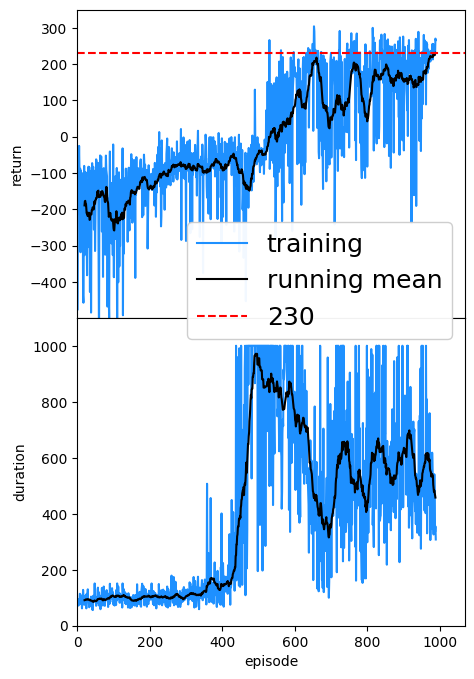

In [7]:
# Plot both the return per episode and the duration per episode during
# training, together with their running average over 20 consecutive episodes

N = 20 # number of episodes for running average

def running_mean(x,N=20):
        x_out = np.zeros(len(x)-N,dtype=float)
        for i in range(len(x)-N):
                x_out[i] = np.mean(x[i:i+N+1])
        return x_out
        
def plot_returns_and_durations(training_results,filename=None):
    fig,axes = plt.subplots(2,1,figsize=(5,8))
    fig.subplots_adjust(hspace=0.0001)
    #
    # return as a function of episode
    ax = axes[0]
    x = training_results['epsiode_returns']
    t = np.arange(len(x)) + 1
    #
    ax.plot(t,x,label='training',color='dodgerblue',)
    # add running mean
    x = running_mean(x=x,N=N)
    t = np.arange(len(x)) + N
    ax.plot(t,x,color='black',label='running mean')
    #
    ax.axhline(230,ls='--',
               label='230',
                        color='red')
    #
    ax.set_ylim(-499,350)
    ax.set_xticks([])
    ax.set_xlim(0,len(t)+100)
    ax.set_xlabel(r'episode')
    ax.set_ylabel(r'return')
    #
    #
    ax = axes[1]
    x = training_results['episode_durations']
    t = np.arange(len(x)) + 1
    #
    ax.plot(t,x,label='training',color='dodgerblue',)
    # add running mean
    x = running_mean(x=x,N=N)
    t = np.arange(len(x)) + N
    ax.plot(t,x,color='black',label='running mean')
    #
    ax.axhline(1200,ls='--', # draw line outside of plot scale, 
                label='230', # to get the red dotted line into the legend
                        color='red')
    #
    ax.set_ylim(0,1100)
    ax.set_xlim(0,len(t)+100)
    ax.set_xlabel(r'episode')
    ax.set_ylabel(r'duration')
    ax.legend(loc='upper right',bbox_to_anchor=(1.,1.35),
                                framealpha=0.95,
                        fontsize=18)
    #
    plt.show()
    if filename != None:
        fig.savefig(filename,bbox_inches='tight')
    plt.close(fig)

plot_returns_and_durations(training_results=training_results)

# Create gameplay video using trained agent

First we create a "live" video that pops up and shows Lunar Lander gameplay performed by the agent

In [8]:
# There is the issue that the game window freezes when running gym games 
# in jupyter notebooks, see https://github.com/openai/gym/issues/2433
# We here use the fix from that website, which is to use the following
# wrapper class:
class PyGameWrapper(gym.Wrapper):
    def render(self, **kwargs):
        retval = self.env.render( **kwargs)
        for event in pygame.event.get():
            pass
        return retval

In [9]:
# Create a wrapped environment
env = PyGameWrapper(gym.make('LunarLander-v3',render_mode='human'))

N_episodes = 20

result_string = 'Run {0}: duration = {1}, total return = {2:7.3f}'

for j in range(N_episodes):
    state, info = env.reset()

    total_reward = 0
    for i in itertools.count():
        #env.render()

        action = my_agent.act(state)
        state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        total_reward += reward

        if done:
            print(result_string.format(j+1,i+1,total_reward))
            break
    
env.close()

Run 1: duration = 754, total return = 214.656
Run 2: duration = 277, total return = 252.161
Run 3: duration = 281, total return = 254.788
Run 4: duration = 420, total return = 239.110
Run 5: duration = 381, total return = 230.136
Run 6: duration = 329, total return = 278.772
Run 7: duration = 1000, total return =  79.885
Run 8: duration = 288, total return = 255.022
Run 9: duration = 304, total return = 251.170
Run 10: duration = 272, total return = 271.733
Run 11: duration = 288, total return = 244.362
Run 12: duration = 1000, total return = 164.153
Run 13: duration = 278, total return = 293.760
Run 14: duration = 318, total return = 245.329
Run 15: duration = 1000, total return = 139.561
Run 16: duration = 408, total return = 194.857
Run 17: duration = 278, total return = 271.898
Run 18: duration = 401, total return = 194.404
Run 19: duration = 284, total return = 266.523
Run 20: duration = 302, total return = 276.703


We also create a video file containing 20 games played by the agent

In [11]:
import gymnasium as gym
from gymnasium.wrappers import RecordVideo

# Create environment with video recording wrapper
env = RecordVideo(
    gym.make('LunarLander-v3', render_mode="rgb_array"),
    "videos",  # Directory to save videos
    episode_trigger=lambda x: True  # Record every episode
)

N_episodes = 20
result_string = 'Run {0}: duration = {1}, total return = {2:7.3f}'

for j in range(N_episodes):
    state, info = env.reset()
    total_reward = 0
    
    for i in itertools.count():
        action = my_agent.act(state)
        state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        
        done = terminated or truncated
        if done:
            print(result_string.format(j+1, i+1, total_reward))
            break

env.close()


C:\Users\Felz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\gymnasium\wrappers\rendering.py:283: UserWarning: WARN: Overwriting existing videos at d:\lunar lander\lunar-lander\videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Run 1: duration = 273, total return = 270.171
Run 2: duration = 1000, total return = 149.916
Run 3: duration = 342, total return = 253.370
Run 4: duration = 523, total return = 240.619
Run 5: duration = 435, total return = 214.460
Run 6: duration = 1000, total return = 125.891
Run 7: duration = 351, total return = 209.368
Run 8: duration = 285, total return = 284.262
Run 9: duration = 282, total return = 257.638
Run 10: duration = 512, total return = 245.079
Run 11: duration = 411, total return = 229.065
Run 12: duration = 1000, total return =  80.318
Run 13: duration = 1000, total return = 120.931
Run 14: duration = 336, total return = 288.365
Run 15: duration = 293, total return = 272.431
Run 16: duration = 321, total return = 264.494
Run 17: duration = 324, total return = 267.012
Run 18: duration = 278, total return = 264.601
Run 19: duration = 1000, total return = 158.575
Run 20: duration = 279, total return = 247.930
